In [52]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from example_code import muon_functions as mf

# Setting Matplotlib Parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Lucida Grande",
    "figure.figsize": (18,10),
    "figure.dpi": 300,
    'font.size': 30,
    'axes.grid': True,
    'savefig.format' : "pdf",
})

save_path = './figs/'

In [ ]:
def mei_hime_depth_plot():
    '''For plotting Mei & Hime's equation 1: The depth-intensity relation (DIR)'''
    depths = np.linspace(0.2, 8, 200)

    #Free Parameters 
    i1 = 8.60e-6 # sec^−1 cm^−2 sr^-1
    i2 = 0.44e-6 # sec^−1 cm^−2 sr^-1
    lam1 = 0.45 #km.w.e
    lam2 = 0.87 #km.w.e

    mh_depth_intensity = lambda vdepth : i1*np.exp(-vdepth/lam1) + i2*np.exp(-vdepth/lam2)

    fig, ax = plt.subplots()
    ax.plot(depths, mh_depth_intensity(depths))
    ax.set_yscale('log')
    ax.set_xlabel('Vertical Depth [km.w.e]')
    ax.set_ylabel('Differential Muon Intensity [cm$^{-2}$s$^{-1}$sr$^{-1}$]')
    ax.scatter(6.011, 3.77e-10, marker='s', color = 'orange', s = 500, label = 'SNOLAB')
    ax.scatter(1.585, 4.77e-7, marker='P', color = 'red', s = 500, label = 'WIPP')
    ax.legend()
    plt.savefig(save_path + 'mh_depth_intensity')

mei_hime_depth_plot()

In [ ]:
def disk_sample_plot():
    ''' To demonstrate the potential errors in sampling points from a disk. For this example, let the disk be of radius 5'''
    polar_angles = np.linspace(0, np.pi*2, 1000)
    radii = np.random.random(size = 1000)*25

    x_vals = np.sqrt(radii)*np.cos(polar_angles)
    y_vals = np.sqrt(radii)*np.sin(polar_angles)

    wrong_radii = np.random.random(size = 1000)*5
    x_wrong = wrong_radii*np.cos(polar_angles)
    y_wrong = wrong_radii*np.sin(polar_angles)

    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax2.scatter(x_vals, y_vals); ax1.set_title('Wrong')
    ax1.scatter(x_wrong, y_wrong); ax2.set_title('Right')

    plt.savefig(save_path + 'disk_sampling')

disk_sample_plot()

In [ ]:
def zenith_distribution_plot():
    '''Based on Mei & Hime's Equation 3'''
    from scipy.integrate import quad

    vdepth = 5.89 # km.w.e
    i1 = 8.60e-6 # sec^−1 cm^−2 sr^-1
    i2 = 0.44e-6 # sec^−1 cm^−2 sr^-1
    lam1 = 0.45 #km.w.e
    lam2 = 0.87 #km.w.e

    mh3 = lambda zenith : i1*np.exp(-vdepth/(lam1*np.cos(zenith))) + i2*np.exp(-vdepth/(lam2*np.cos(zenith)))/np.cos(zenith)
    mh3_norm = quad(mh3, 0, np.pi/2)[0]

    mh3_projected = lambda zenith : i1*np.exp(-vdepth/(lam1*np.cos(zenith))) + i2*np.exp(-vdepth/(lam2*np.cos(zenith)))*np.sin(zenith)
    mh3_projected_norm = quad(mh3_projected, 0, np.pi/2)[0]

    zenith_angles = np.linspace(0, np.pi/2, 200)

    fig, ax = plt.subplots()
    ax.set_xlabel('Zenith Angle [rad]')
    ax.set_ylabel('Arbitrary Units')
    ax.plot(zenith_angles, mh3(zenith_angles)/mh3_norm, label = 'Mei \& Hime zenith angle muon intensity')
    ax.plot(zenith_angles, mh3_projected(zenith_angles)/mh3_projected_norm, label = 'Projected onto horizontal')
    ax.legend()
    plt.savefig(save_path + 'mh_zenith_dist')

zenith_distribution_plot()

In [ ]:
def plot_cylinder(radius, height):
    
    plt.rcParams.update({'font.size': 20})
    # Change figure size to your liking
    fig = plt.figure(figsize=(15,10))
    
    # Necessary for 3-dimensional projection
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    # Create parameter domains over which to define parametric functions
    u = np.linspace(0, np.pi*2, 60)
    t = np.linspace(0, radius, 60)
    z = np.linspace(-height/2, height/2, 2)

    #Defining the parametric space for making the top and bottom circles
    U, T = np.meshgrid(u, t)

    #For top and bottom
    X1 = T*np.cos(U)
    Y1 = T*np.sin(U)
    ZTop = z[0]*np.ones(X1.shape)
    ZBottom = z[1]*np.ones(X1.shape)

    #Defining the parametric space for making the cylindrical column
    u, z = np.meshgrid(u, z)

    x = radius * np.cos(u)
    y = radius * np.sin(u)

    #Column
    ax.plot_surface(x, y, z, color='b', alpha = 0.3)
    #Top & Bottom
    ax.plot_surface(X1, Y1, ZTop, alpha=0.3, color='cyan', rstride=6, cstride=12)
    ax.plot_surface(X1, Y1, ZBottom, alpha=0.7, color='green', rstride=6, cstride=12)
    #plt.title('Cylinder')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.view_init(25, 45)
    plt.savefig(save_path + 'od_cylinder')
    plt.show()
    
plot_cylinder(6.1722, 12.8)

In [ ]:
def find_max_angle(level = 0.95, tolerance = 0.001):
    from scipy.optimize import newton
    from scipy.integrate import quad
    from numpy import exp, sin, cos, pi

    # Define constants used through functions
    I1 = 8.60e-6
    lam1 = 0.45
    I2 = 0.44e-6
    lam2 = 0.87
    vdepth = 5.89

    # Define our function as a callable lambda function object
    func = lambda x : (I1*exp(-vdepth/(lam1*cos(x))) + I2*exp(-vdepth/(lam2*cos(x))))*sin(x)

    # Define normalization constant and define parameter L
    A = 1/quad(func, 0, pi/2)[0]

    # Define normalized function
    func_normd = lambda x : A*(I1*exp(-vdepth/(lam1*cos(x))) + I2*exp(-vdepth/(lam2*cos(x))))*sin(x) - level

    # Determine the max angle
    max_angle = newton(func_normd, pi/3, tol= tolerance)  # Radians

    return max_angle

find_max_angle()

In [ ]:
def plot_disk_points():
    plt.rcParams.update({ 'font.size': 15})

    od = mf.OuterDetector()

    OD_Height =od.height
    OD_Radius = od.radius

    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    u = np.linspace(0, np.pi*2, 60)
    t = np.linspace(0, OD_Radius, 60)
    z = np.linspace(-OD_Height/2, OD_Height/2, 2)

    #Defining the parametric space for making the top and bottom circles
    U, T = np.meshgrid(u, t)

    #For top and bottom
    X1 = T*np.cos(U)
    Y1 = T*np.sin(U)
    ZTop = OD_Height/2*np.ones(X1.shape)
    ZBottom = -OD_Height/2*np.ones(X1.shape)

    #Defining the parametric space for making the cylindrical column
    z = np.linspace(-OD_Height/2, OD_Height/2, 2)
    u, z = np.meshgrid(u, z)

    x = OD_Radius * np.cos(u)
    y = OD_Radius * np.sin(u)

    #Column
    ax.plot_surface(x, y, z, color='b', alpha = 0.3)
    #Top & Bottom
    ax.plot_surface(X1, Y1, ZTop, alpha=0.3, color='cyan', rstride=6, cstride=12)
    ax.plot_surface(X1, Y1, ZBottom, alpha=0.7, color='green', rstride=6, cstride=12)
    #plt.title('Outer Detector Cylinder', size = 20)
    ax.set_xlabel('x [m]'); ax.set_ylabel('y [m]'); ax.set_zlabel('z [m]')


    ## Muons:
    # Define muon initial positions
    how_many = 1000
    rhos = np.random.random(size = how_many)*(30**2)
    gen_angles = np.random.random(size = how_many)*np.pi*2

    # Keeping in mind the coordinate transformations 
    initial_x = np.sqrt(rhos)*np.cos(gen_angles)
    initial_y = np.sqrt(rhos)*np.sin(gen_angles)
    initial_z = np.ones(how_many)*(15 + od.height/2)

    ax.scatter3D(initial_x, initial_y, initial_z)
    lims = (-20,20)
    ax.set_xlim(lims); ax.set_ylim(lims)

    ax.view_init(elev = 20, azim=45)

    plt.savefig(save_path+'disk_points.png', transparent = True)
    plt.show()

plot_disk_points()

In [34]:
def offset_variance_data():
    '''A function to create the data for a plot depicting the variance of the muon flux as a function of the offset given a constant radius or one that varies linearly with the offset '''

    #TAKES ~20 mins to run

    od = mf.OuterDetector()

    rate = 100 # muons per square meter
    offsets = np.linspace(1,50,50) # meters
    radii = od.radius + (od.height + offsets)*np.tan(1)
    constant_radius = radii[0] #m

    # Define lists for numbers intersecting muons
    steady_radius = []
    varying_radius = []

    for i in range(len(offsets)):
        steady_radius.append(len(mf.muons_per_square_meter(100, od, offsets[i], constant_radius)))

        varying_radius.append(len(mf.muons_per_square_meter(100, od, offsets[i], radii[i])))

    steady = np.array(steady_radius, dtype=int)
    varying = np.array(varying_radius, dtype=int)

    return np.array([offsets, radii, steady_radius, varying_radius])


In [35]:
offset_data = offset_variance_data()

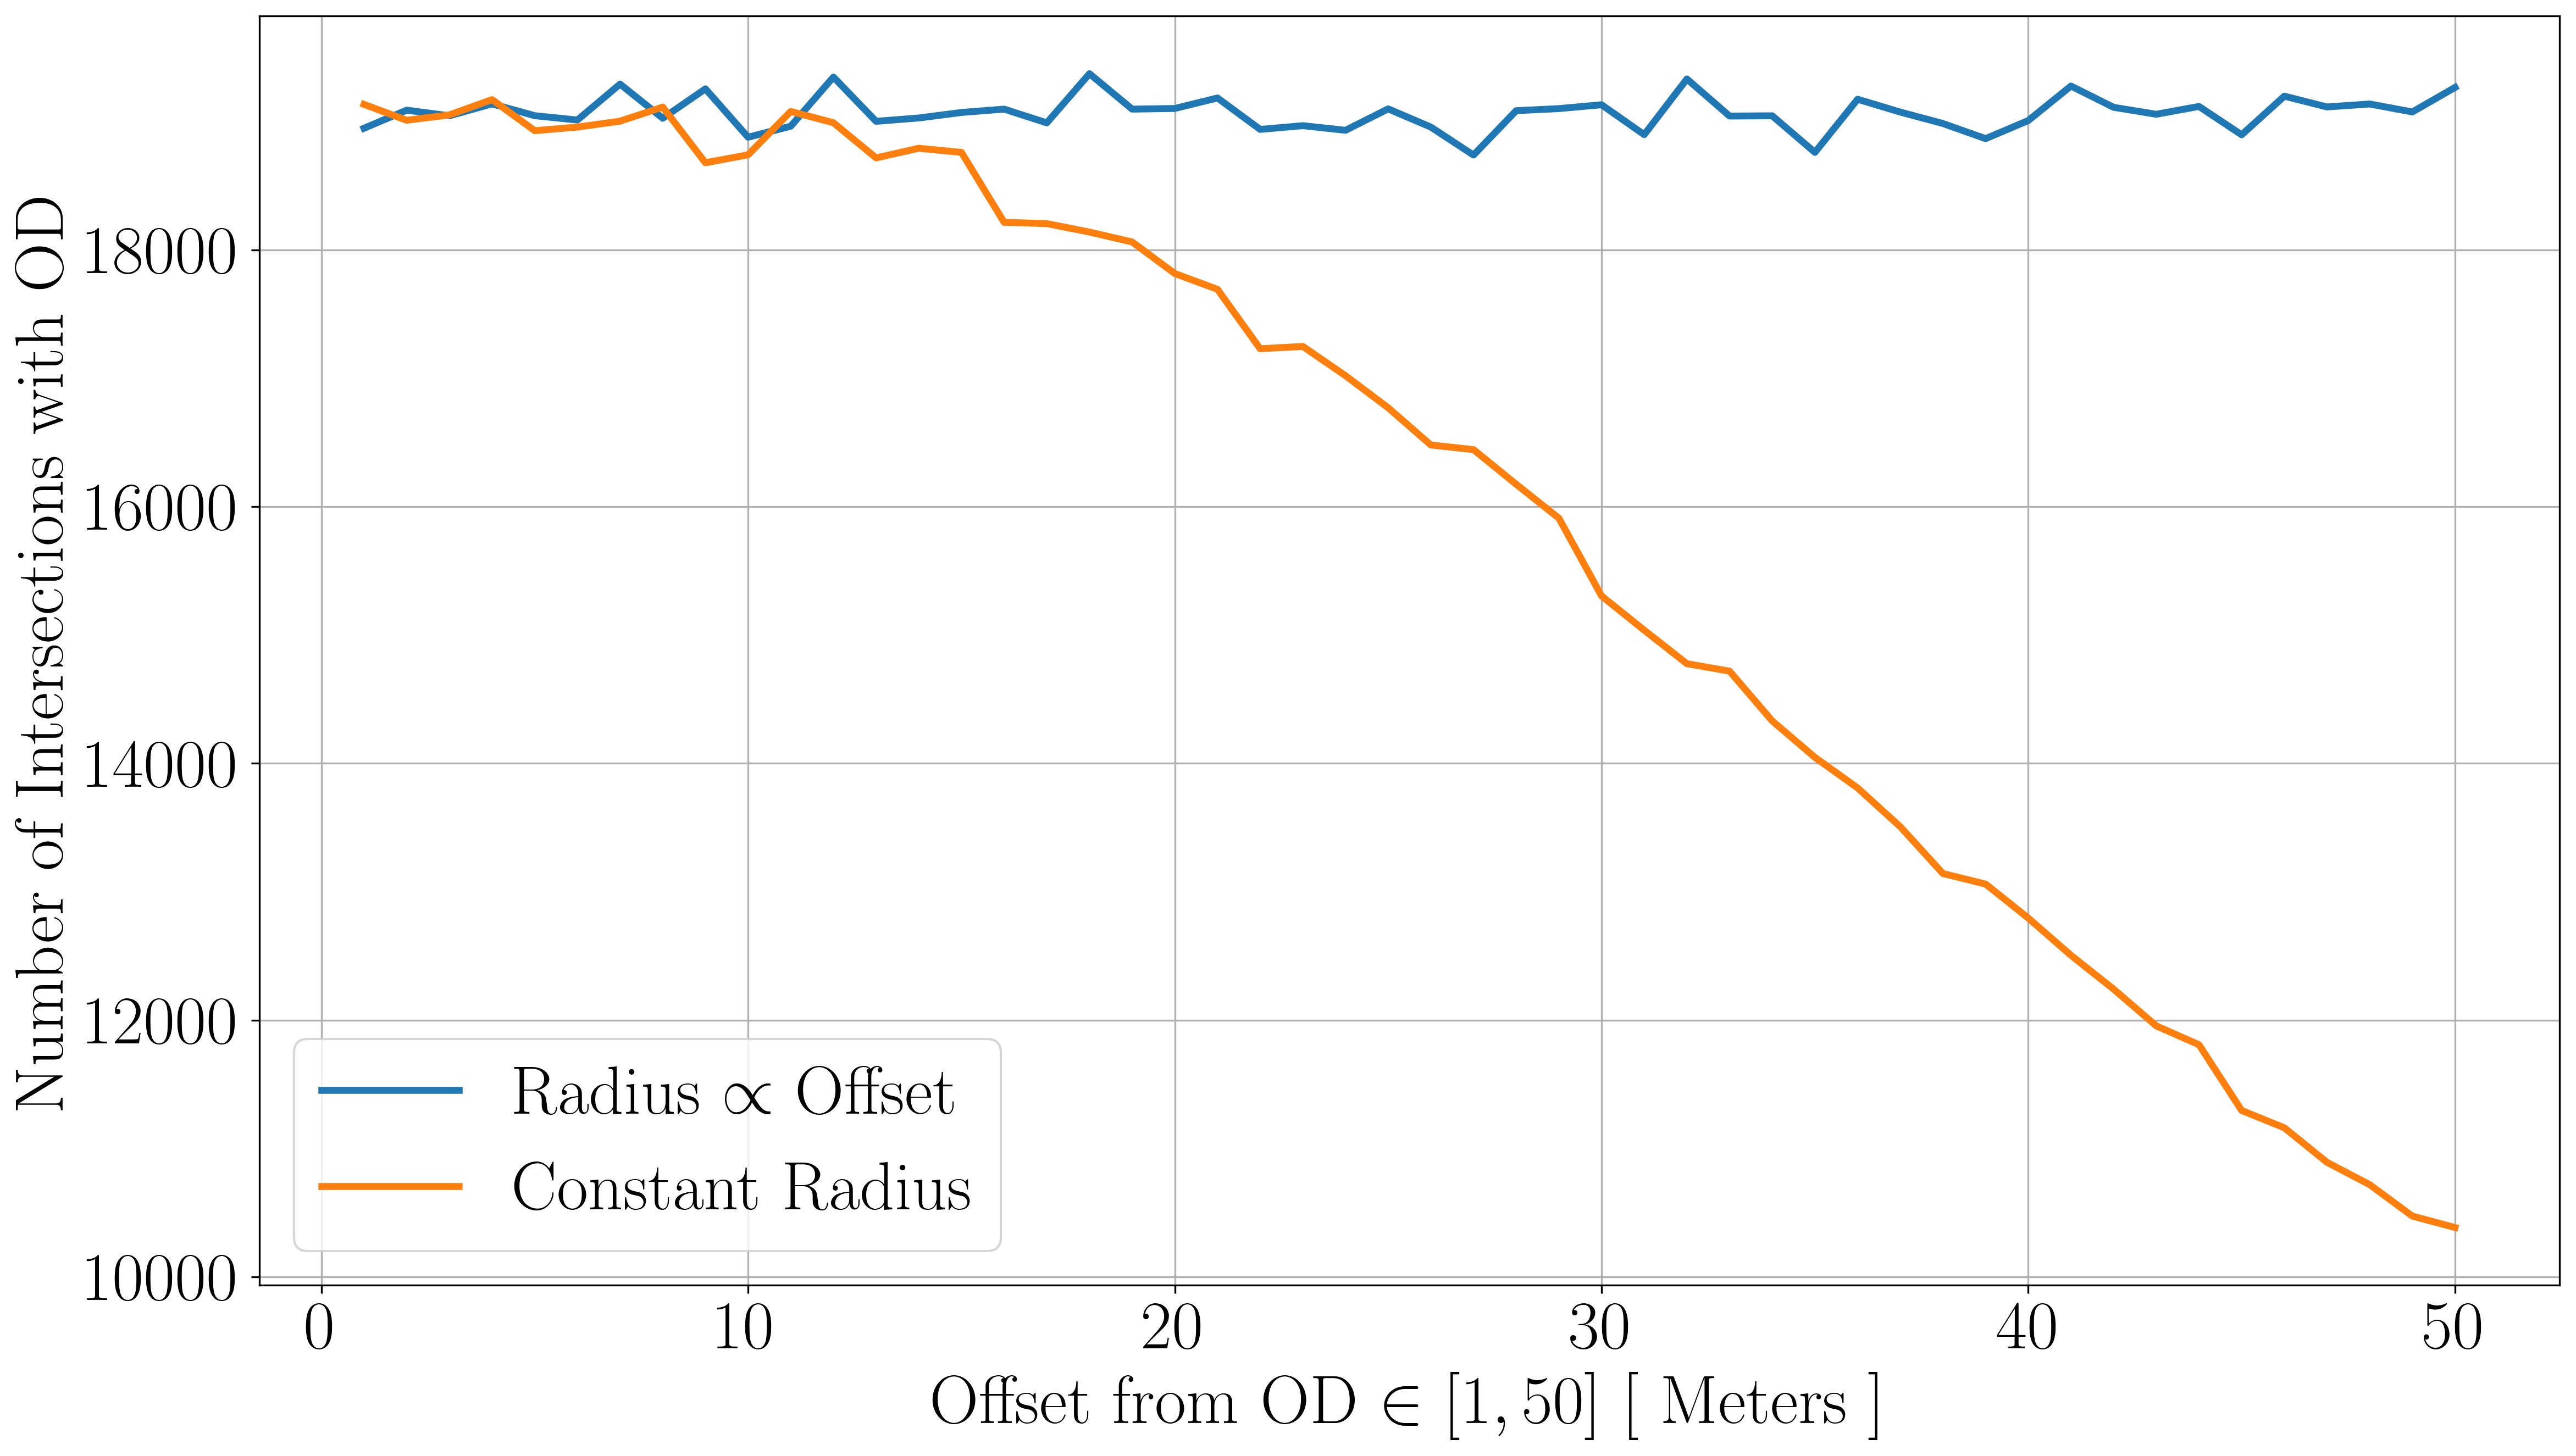

In [36]:
def offset_data_plot(offset_data):
    fig, ax = plt.subplots()
    ax.plot(offset_data[0], offset_data[3], label = r'Radius $\propto$ Offset', linewidth = 3)
    ax.plot(offset_data[0], offset_data[2], label = 'Constant Radius', linewidth = 3)
    ax.set_ylabel('Number of Intersections with OD')
    ax.set_xlabel('Offset from OD $\in [1, 50]$ [ Meters ]')
    ax.legend()
    plt.savefig(save_path+'offset_plot')

offset_data_plot(offset_data)

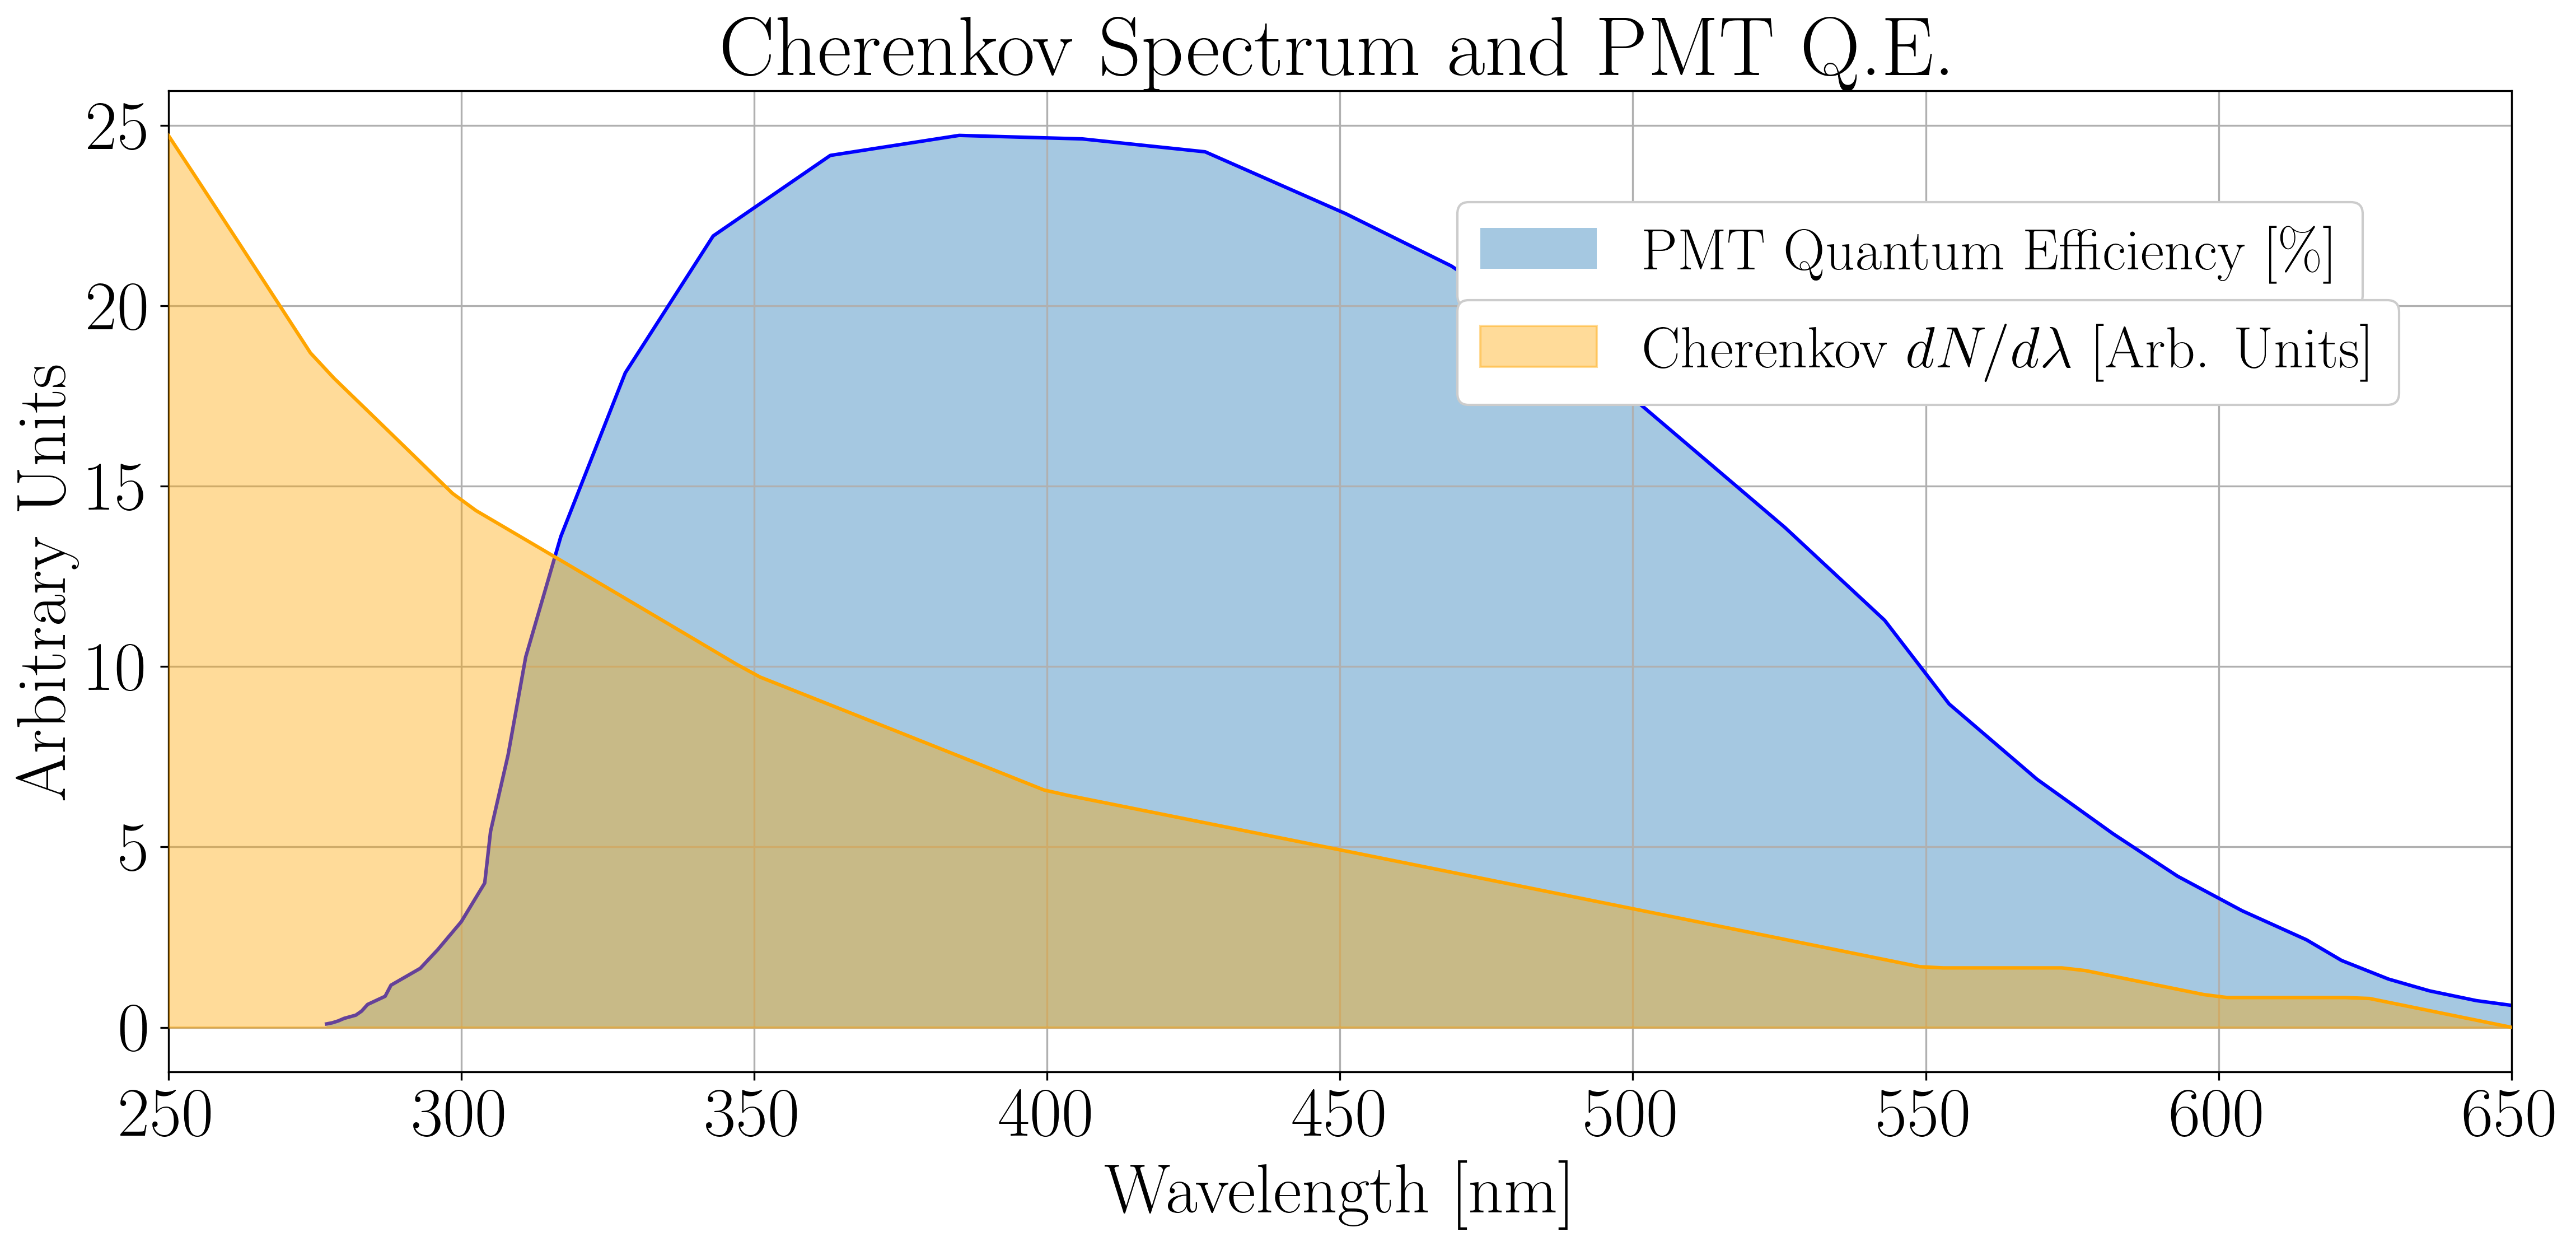

In [62]:
def cherenkov_plot():
    from scipy import constants as cst
    from scipy.integrate import quad
    import pandas as pd

    ### IMPORTING DATA ###
    h2o = pd.read_csv('example_code/misc_data/nH2O(2).csv')

    water_wl = np.array(h2o['wl [um]'], dtype = float)*1000
    water_n = np.array(h2o['n'], dtype = float)

    E = mf.SNOLAB_MU_E_AVG
    beta = np.sqrt(1-(mf.mu_rest_mass_MeV/(1000*E + mf.mu_rest_mass_MeV))**2) # Relativistic Kinetic Energy
    index = lambda wl : np.interp(wl, water_wl, water_n)

    dNdwl = lambda wl : ((2*np.pi*cst.e**2)/(cst.hbar*cst.c**2))*(1-(1/(beta**2*index(wl)**2)))
    dNdwl = lambda wl : ((2*np.pi*cst.e**2)/(cst.hbar*cst.c**2))*(1-(1/(beta**2*index(wl)**2)))
    wavelengths = np.linspace(250, 650, 100)
    probs = dNdwl(wavelengths)
    probs = probs/np.sum(probs)*100

    qe = pd.read_csv('example_code/misc_data/R5912QE.csv')

    ### MAKING PLOT ###

    plt.rcParams.update({
    #     "text.usetex": True,
         "figure.figsize": (18,8),
    #     "figure.dpi": 300,
    #     'font.size': 30,
    #     'axes.grid': True
        
     })

    fig, ax = plt.subplots()

    ax.fill_between(qe['wl [nm]'], qe['QE [%]'], alpha = 0.4,label = 'PMT Quantum Efficiency [\%]')
    plt.plot(qe['wl [nm]'], qe['QE [%]'], color = 'blue')
    ax.set_xlabel('Wavelength [nm]'); ax.set_ylabel('Arbitrary Units')
    plt.legend(loc=(0.55, 0.78), fontsize = 'small', framealpha = 1)
    ax2 = ax.twinx()
    ax2.fill_between(wavelengths,y1= probs.min(), y2=probs, alpha = 0.4, color = 'orange', label = r'Cherenkov $dN/d\lambda$ [Arb. Units]')
    ax2.grid()
    plt.plot(wavelengths, probs, color = 'orange')
    ax2.axis('off')
    ax2.set_yticklabels('')
    plt.xlim((250,650));
    plt.legend(loc=(0.55, 0.68), fontsize = 'small', framealpha = 1)
    plt.title('Cherenkov Spectrum and PMT Q.E.')
    plt.subplots_adjust(bottom=0.15)

    plt.savefig(save_path+'cherenkov_qe')

cherenkov_plot()

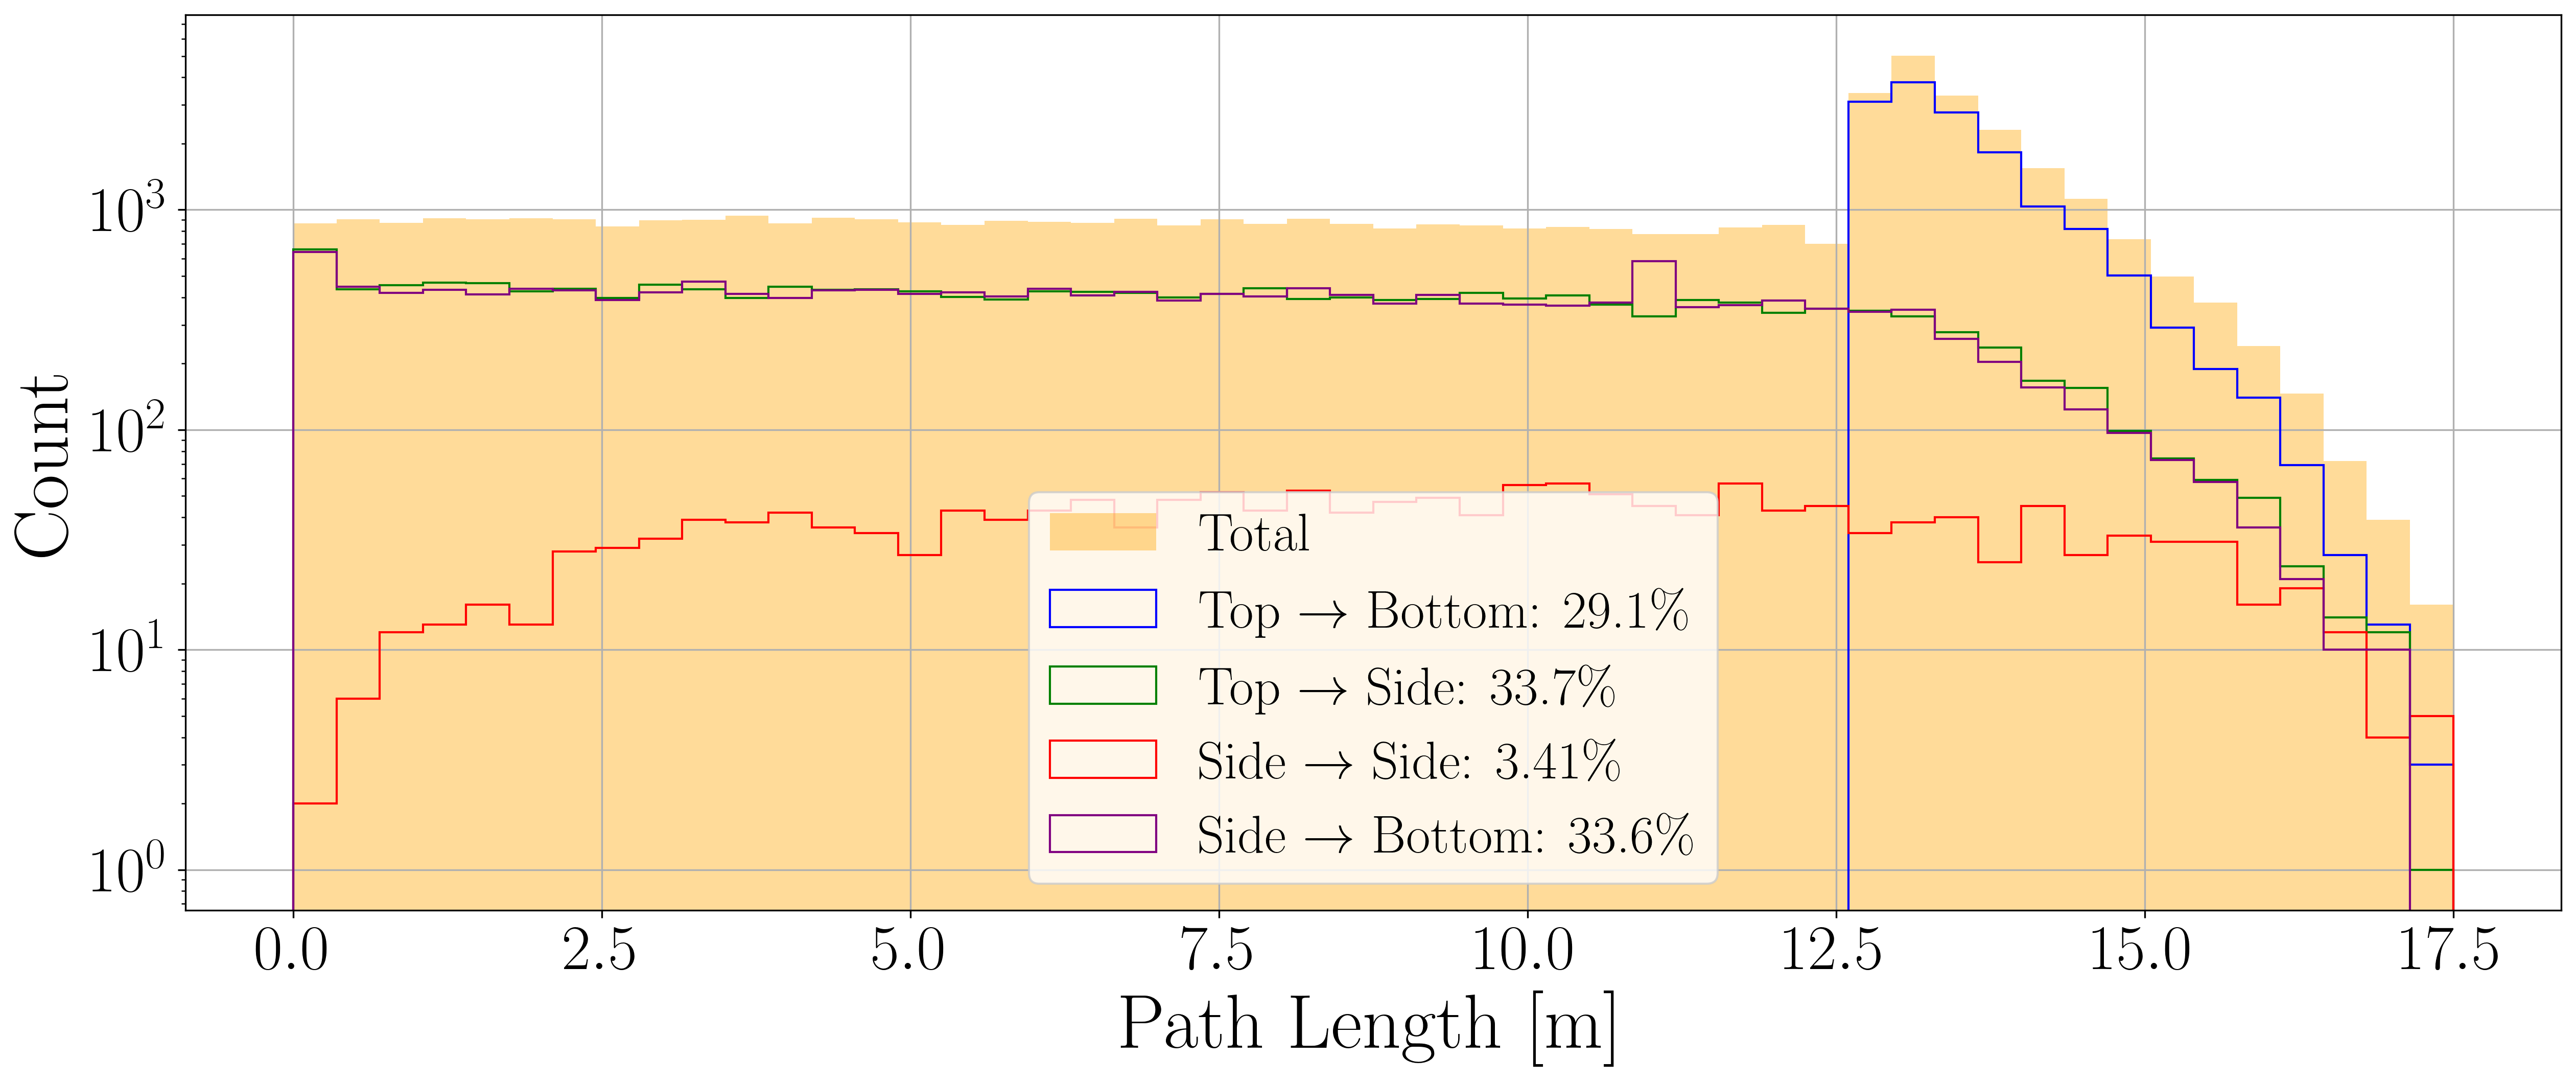

In [71]:
def plot_path_lengths(paths, filename):
    ''' A function designed to plot a histogram of the points from the previous intersection_points function. Pass this function an array
    argument equivalent to the output from the previous.
    '''
    import matplotlib.pyplot as plt
    plt.rcParams.update({
    "figure.figsize": (20,8),
    "text.usetex": True,})

    pathLengths = []
    top_bottom = [] #Muons that pass through both top and bottom
    top_side = []
    side_side = []
    ssCount = 0
    side_bottom = []

    ##(entryPoint, entryLabel, exitPoint, exitLabel)
    for path in paths:
        if not type(path) is bool: #If there is an entry point
            if type(path[1]) is str:
                pathLength = path[0]
                #If points are both top and bottom, append there
                if path[1] == 'TOP' and path[2] == 'BOT':
                    top_bottom.append(pathLength)
                #If points are top side, append there
                elif path[1] == 'TOP' and path[2] == 'SIDE':
                    top_side.append(pathLength)
                #If points are side side, append there
                elif path[1] == 'SIDE' and path[2] == 'SIDE':
                    side_side.append(pathLength)
                    ssCount += 1
                #If points are side bottom, append there
                elif path[1] == 'SIDE' and path[2] == 'BOT':
                    side_bottom.append(pathLength)
                pathLengths.append(pathLength)
            else:
                print(' Points input for path_lengths function requires labels being switched on ')

    bins = 100
    counts_tb, bins_tb = np.histogram(top_bottom, bins = bins, density=False)
    counts_ts, bins_ts = np.histogram(top_side, bins = bins, density=False)
    counts_ss, bins_ss = np.histogram(side_side, bins = bins, density=False)
    counts_sb, bins_sb = np.histogram(side_bottom, bins = bins, density=False)

    counts, bins = np.histogram(pathLengths, bins = 50, density=False)
    plt.figure()
    plt.hist(bins[:-1], bins, weights=counts, histtype='stepfilled', alpha=0.4, color='orange', label = 'Total')
    plt.xlabel('Path Length [m]', size = 'large'); plt.ylabel('Count', size = 'large')
    #plt.text(1, counts[0]*1.5, 'Mean = ' + str(np.average(pathLengths)), size = 12)
    #plt.title('Path Length Distribution: '+ str(len(pathLengths)) + ' paths', size = 'x-large')

    #Plotting other subordinate hists
    top_bot = str(len(top_bottom)*100/len(pathLengths))[0:4]
    plt.hist(bins_tb[:-1], bins, weights=counts_tb, histtype='step', alpha=1.0, color='blue', label = r'Top $\rightarrow$ Bottom: ' + top_bot + '\%')
    top_sides = str(len(top_side)*100/len(pathLengths))[0:4]
    plt.hist(bins_ts[:-1], bins, weights=counts_ts, histtype='step', alpha=1.0, color='green', label = r'Top $\rightarrow$ Side: ' + top_sides + '\%')
    sides = str(len(side_side)*100/len(pathLengths))[0:4]
    plt.hist(bins_ss[:-1], bins, weights=counts_ss, histtype='step', alpha=1.0, color='red', label = r'Side $\rightarrow$ Side: ' + sides + '\%')
    side_bot = str(len(side_bottom)*100/len(pathLengths))[0:4]
    plt.hist(bins_sb[:-1], bins, weights=counts_sb, histtype='step', alpha=1.0, color='purple', label = r'Side $\rightarrow$ Bottom: ' + side_bot + '\%')

    plt.yscale('log')
    plt.legend(loc = 8, fontsize = 'small')
    #plt.grid()
    #print('Mean:', np.mean(pathLengths))
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(save_path+filename, facecolor = 'white')
    plt.show()

muons = mf.intersecting_muons(50000)
path_lengths = []
for muon in muons:
    path_lengths.append(mf.path_length(muon, ignore_cover_gas=False, ignore_cryostat=False))


plot_path_lengths(path_lengths, 'path_lengths1')

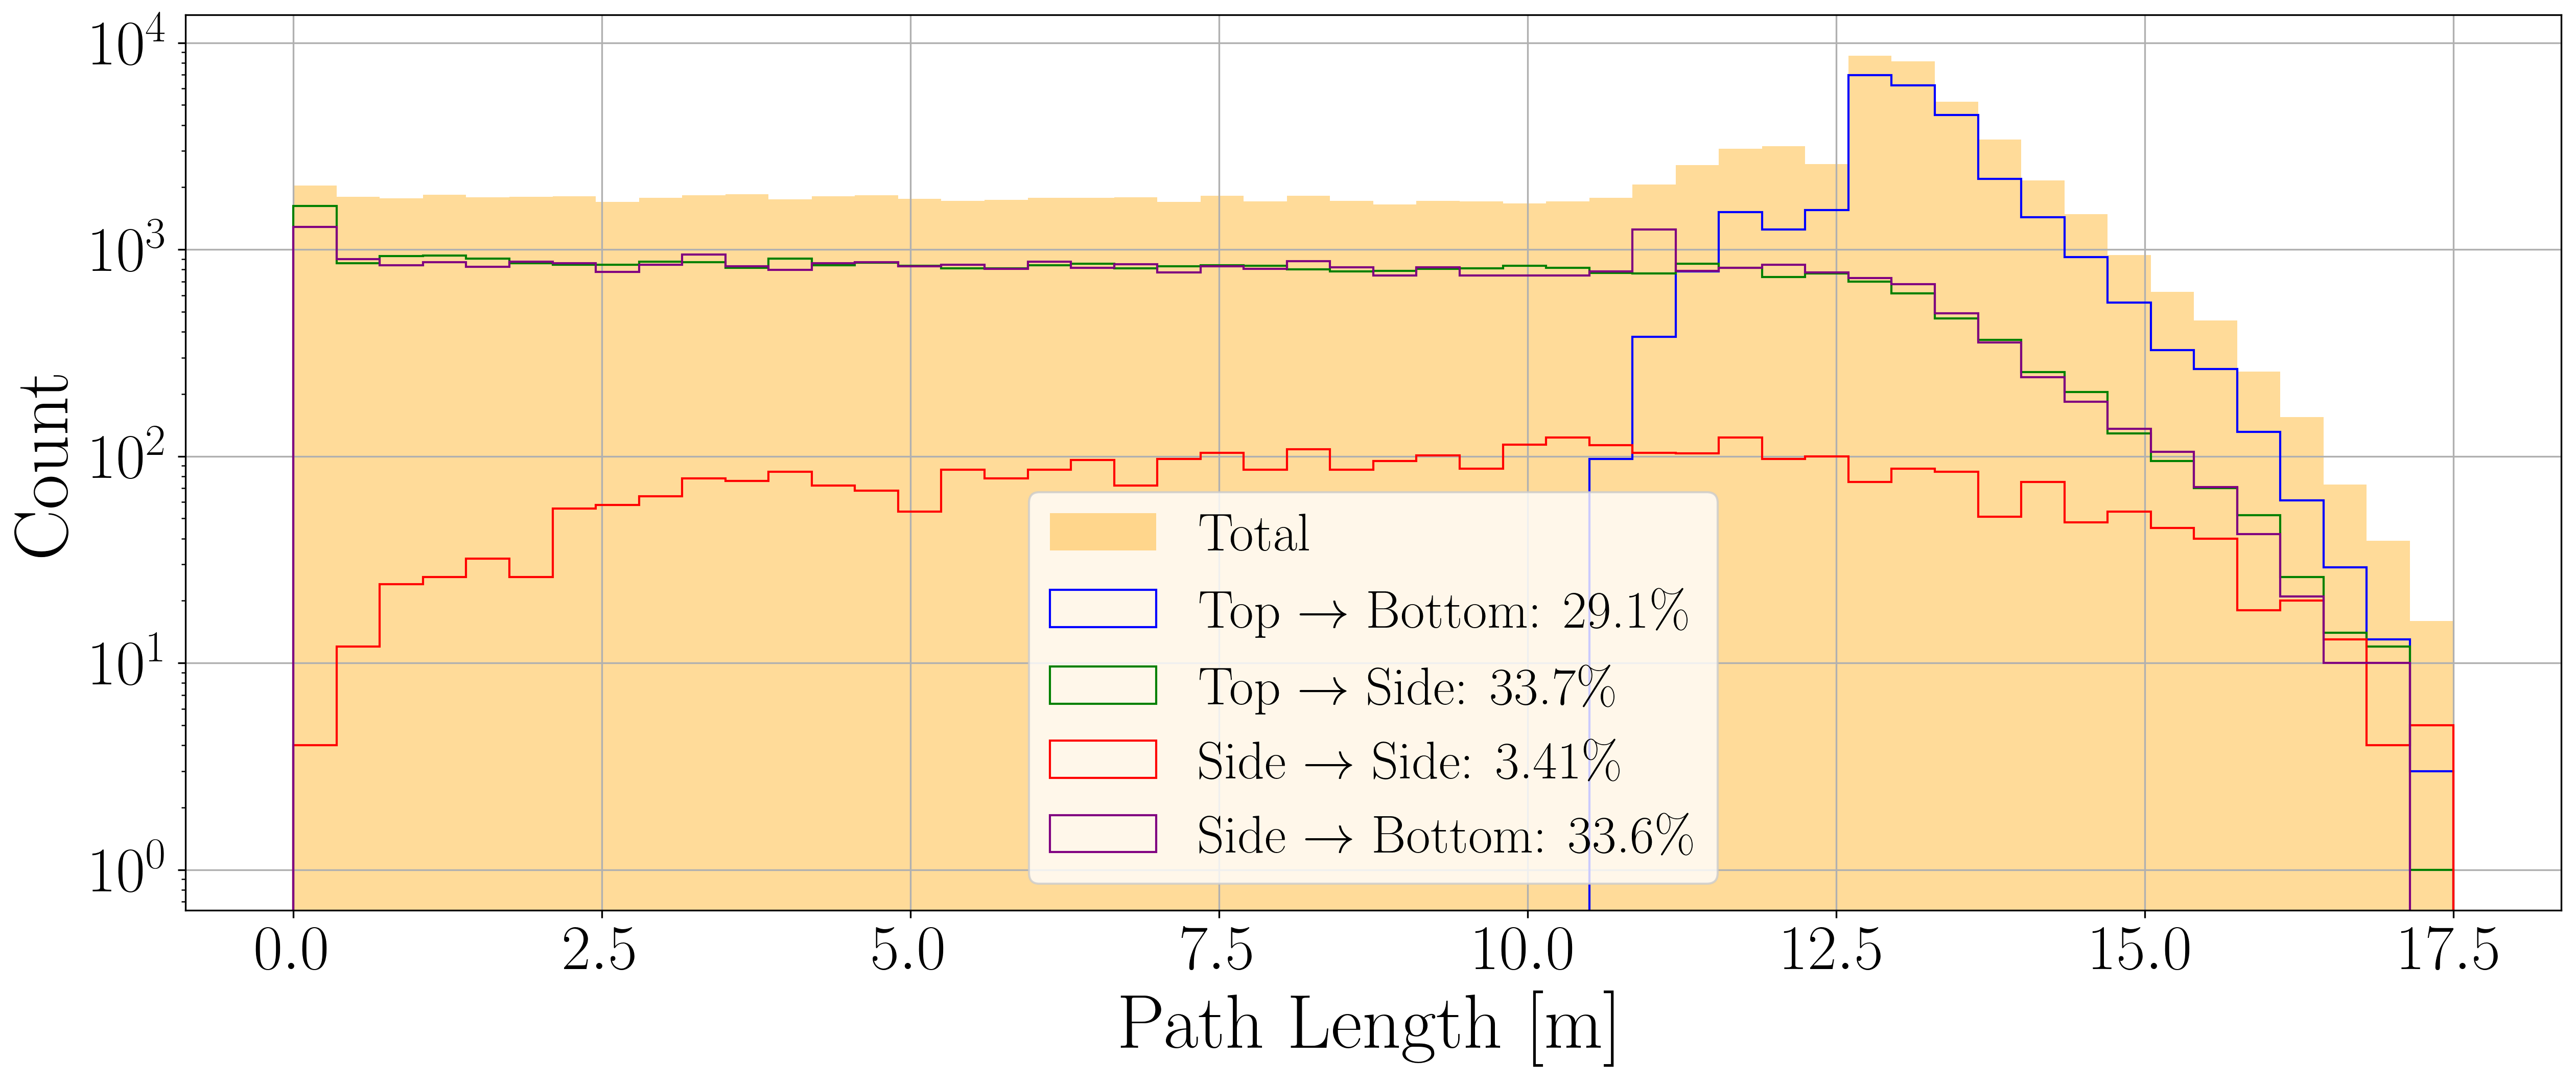

In [72]:
for muon in muons:
    path_lengths.append(mf.path_length(muon, ignore_cover_gas=True, ignore_cryostat=True))


plot_path_lengths(path_lengths, 'path_lengths2')